<a href="https://colab.research.google.com/github/jingyi0936/PyEMD-Example/blob/main/eemd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EEMD Analysis Example 
[PyEMD](https://pyemd.readthedocs.io/en/latest/) : documentation of PyEMD
    
 *超链接是PyEMD的索引*

In [1]:
pip install EMD-signal

     |████████████████████████████████| 81kB 3.8MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 


In [2]:
from PyEMD import EEMD
import numpy as np
import pandas as pd
import pylab as plt

## Define s reprenting signal and t representing time

In [3]:
# Define signal 定义信号
s = pd.read_csv('data.csv') # csv file should have only one column
# You can choose header to be T/F
# s is now stored in a Pandas Dataframe
s = s.to_numpy() # convert the data frame to a numpy array
s = np.concatenate(s) # concatenate s to ensure the shape of s and t being the same

In [4]:
t = np.linspace(0, 1, len(s)) # length of s and t should be the same

## Execute EEMD on signal
执行EEMD算法




In [6]:
# Assign EEMD to `eemd` variable
eemd = EEMD()

# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection="parabol"

# Execute EEMD on S
eIMFs = eemd.eemd(s, t)
nIMFs = eIMFs.shape[0]

In [9]:
# Get the shape of IMF calculated
eIMFs.shape

(6, 219)

## Extract IMF and Plot Results
提取IMF


1.   IMF1 + IMF2 + IMF3 + IMF4 + IMF5
2.   IMF1 + IMF2 + IMF3 + IMF4
3.   Summary Figure




In [10]:
data = pd.DataFrame({'Column1': eIMFs[0, :], 'Column2': eIMFs[1, :], 'Column3': eIMFs[2, :],
                     'Column4': eIMFs[3, :], 'Column5': eIMFs[4, :], 'Column6': eIMFs[5, :]})

### IMF1 + IMF2 +IMF3 + IMF4 + IMF5
Column 2 + Column 3 + Column 4 + Column 5 + Column 6

In [11]:
new = data['Column2'] + data['Column3'] + data['Column4'] + data['Column5'] + data['Column6']

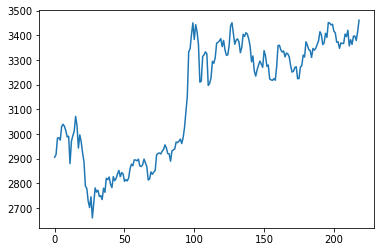

In [12]:
plt.plot(s) # original signal

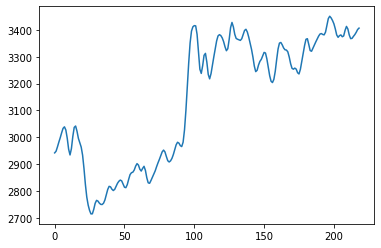

In [13]:
plt.plot(new) # new signal combined of IMF1 + IMF2 + IMF3 + IMF4, IMF1 is ignored

### IMF1 + IMF2 + IMF3 + IMF4
Column 2 + Column 3 + Column 4 + Column 5

In [14]:
new1 = data['Column2'] + data['Column3'] + data['Column4'] + data['Column5'] 

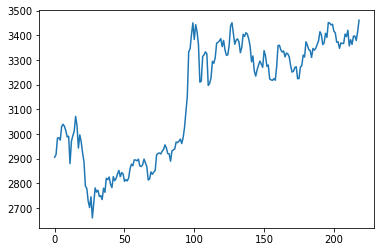

In [15]:
plt.plot(s) # original signal

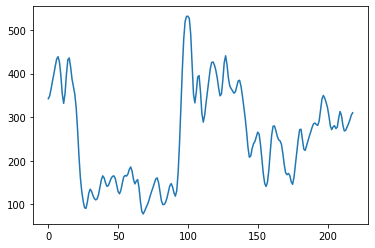

In [16]:
plt.plot(new1)

### Plots of Each IMF in one figure

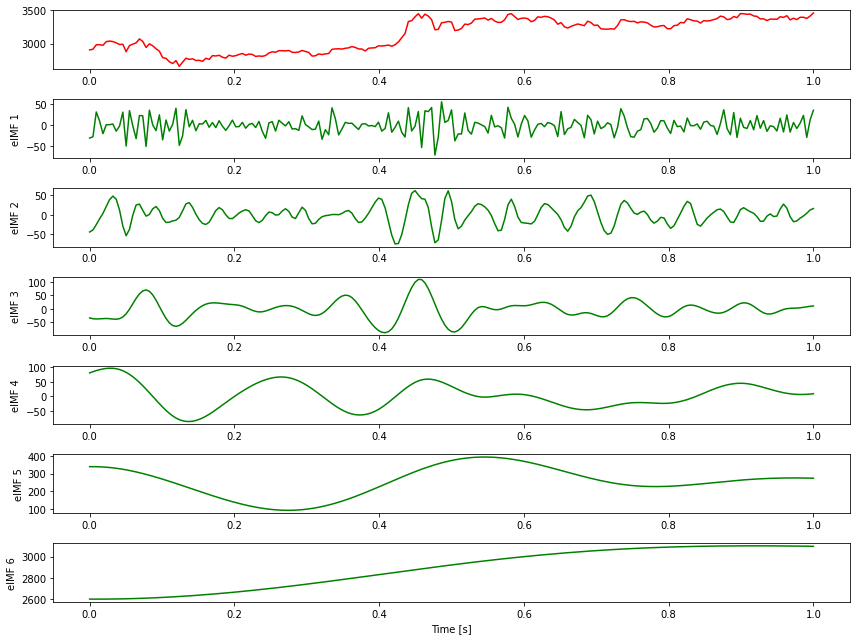

In [8]:
# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, s, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)
plt.show()